In [1]:
#cost = 180.41008, theta0 = 16.9925, theta1 = 1.342
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from __future__ import division

In [2]:
df = pd.read_excel('./data/fire_theft.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
df.head()

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


MSE = 563.3204956054688, theta0 = 0.03366667032241821, theta1 = 0.5471643209457397
MSE = 228.33584594726562, theta0 = 0.7131268978118896, theta1 = 2.1336002349853516
MSE = 225.0001678466797, theta0 = 1.2899725437164307, theta1 = 2.104543924331665
MSE = 221.8966064453125, theta0 = 1.8463815450668335, theta1 = 2.07651686668396
MSE = 219.00909423828125, theta0 = 2.3830764293670654, theta1 = 2.049483060836792
MSE = 216.3225555419922, theta0 = 2.9007580280303955, theta1 = 2.023406982421875
MSE = 213.82298278808594, theta0 = 3.400099039077759, theta1 = 1.998254418373108
MSE = 211.49740600585938, theta0 = 3.881748914718628, theta1 = 1.9739933013916016
MSE = 209.33370971679688, theta0 = 4.346334457397461, theta1 = 1.9505915641784668
MSE = 207.32057189941406, theta0 = 4.794460296630859, theta1 = 1.9280188083648682
MSE = 205.4475555419922, theta0 = 5.226709842681885, theta1 = 1.9062459468841553
MSE = 203.7048797607422, theta0 = 5.643647193908691, theta1 = 1.8852444887161255
MSE = 202.08357238769

MSE = 180.4429168701172, theta0 = 16.569072723388672, theta1 = 1.3349186182022095
MSE = 180.44061279296875, theta0 = 16.584163665771484, theta1 = 1.3341583013534546
MSE = 180.4385223388672, theta0 = 16.59872055053711, theta1 = 1.3334250450134277
MSE = 180.43650817871094, theta0 = 16.612768173217773, theta1 = 1.3327174186706543
MSE = 180.43466186523438, theta0 = 16.626312255859375, theta1 = 1.3320351839065552
MSE = 180.43296813964844, theta0 = 16.639379501342773, theta1 = 1.3313769102096558
MSE = 180.43138122558594, theta0 = 16.651979446411133, theta1 = 1.330742359161377
MSE = 180.4298858642578, theta0 = 16.664142608642578, theta1 = 1.330129623413086
MSE = 180.4285125732422, theta0 = 16.67586898803711, theta1 = 1.3295388221740723
MSE = 180.42723083496094, theta0 = 16.687177658081055, theta1 = 1.328969120979309
MSE = 180.426025390625, theta0 = 16.698087692260742, theta1 = 1.328419804573059
MSE = 180.42491149902344, theta0 = 16.7086124420166, theta1 = 1.3278895616531372
MSE = 180.42390441

MSE = 180.4101104736328, theta0 = 16.984180450439453, theta1 = 1.3140088319778442
MSE = 180.41009521484375, theta0 = 16.984561920166016, theta1 = 1.3139896392822266
MSE = 180.4101104736328, theta0 = 16.984943389892578, theta1 = 1.3139704465866089
MSE = 180.4101104736328, theta0 = 16.98532485961914, theta1 = 1.3139512538909912
MSE = 180.4100799560547, theta0 = 16.985706329345703, theta1 = 1.313932180404663
MSE = 180.4100799560547, theta0 = 16.986087799072266, theta1 = 1.3139129877090454
MSE = 180.4100799560547, theta0 = 16.986469268798828, theta1 = 1.3138937950134277
MSE = 180.41009521484375, theta0 = 16.98685073852539, theta1 = 1.31387460231781
MSE = 180.41009521484375, theta0 = 16.987228393554688, theta1 = 1.3138554096221924
MSE = 180.41009521484375, theta0 = 16.98741912841797, theta1 = 1.3138453960418701
MSE = 180.4101104736328, theta0 = 16.98760986328125, theta1 = 1.3138359785079956
MSE = 180.4100799560547, theta0 = 16.98780059814453, theta1 = 1.313826322555542
MSE = 180.41009521484

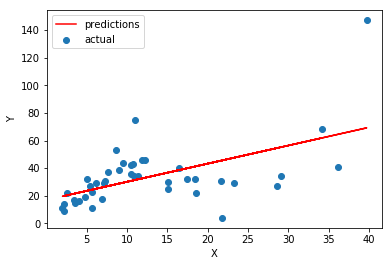

In [4]:
n_samples = df['X'].shape[0]

X = tf.placeholder(name="X", dtype="float32")
Y = tf.placeholder(name="Y", dtype="float32")

theta0 = tf.Variable(0.0, name='theta0')
theta1 = tf.Variable(0.0, name='theta1')

y_pred = X*theta1 + theta0
MSE = tf.multiply((1.0/(2.0 * n_samples)), tf.reduce_sum(tf.pow((y_pred - Y), 2)))
MSE_summary = tf.summary.scalar(tensor=MSE, name='MSE_summary')

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(MSE)

feed_dict = {X: df['X'].values, Y: df['Y'].values}

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/problem1/mse_summary')
    sess.run(tf.global_variables_initializer())
    
    for step in range(30000):
        sess.run(optimizer, feed_dict)
        
        summary = sess.run(MSE_summary, feed_dict)
        writer.add_summary(summary, step)
        
        if(step % 100 == 0):
            print("MSE = {0}, theta0 = {1}, theta1 = {2}".format(sess.run(MSE, feed_dict), sess.run(theta0), sess.run(theta1)))
        
    plt.scatter(df['X'], df['Y'], label='actual')
    plt.plot(df['X'], sess.run(y_pred, feed_dict), c='r', label='predictions')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()